
# Brain Tumor Detection Using SVM

This notebook guides you through the process of building a Support Vector Machine (SVM) model to detect brain tumors from MRI images. We'll cover the following steps:

1. Loading and preprocessing the dataset.
2. Building and training the SVM model.
3. Performing hyperparameter tuning using GridSearchCV.
4. Evaluating the model's performance with various metrics.
5. Visualizing the results to gain insights.

## Why SVM?
SVM is a powerful supervised learning algorithm that is particularly effective for binary classification tasks. By selecting the right kernel and tuning hyperparameters, SVM can create complex decision boundaries, making it suitable for tasks like tumor detection where the data may not be linearly separable.

---
Get the data from https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

## Loading and Preprocessing the dataset

In [80]:

import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(['no', 'yes']):
        path = os.path.join(folder, subfolder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            try:
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize((64, 64))  # Resize to a fixed size (64x64 in this case)
                img_array = np.array(img).flatten()  # Flatten the image
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load the dataset
data_folder = './brain_tumor_dataset'
X, y = load_images_from_folder(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=90)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data loading and preprocessing complete.")


Data loading and preprocessing complete.


## Initialize and Train the model

In [81]:

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf')

# Train the SVM model
svm_model.fit(X_train, y_train)

print("Model initialization and training complete.")


Model initialization and training complete.


## Save the model

In [82]:

import joblib

# Save the trained SVM model
model_filename = 'brain_tumor_detection_svm_model.sav'
joblib.dump(svm_model, model_filename)

print(f"Trained SVM model saved to {model_filename}")


Trained SVM model saved to brain_tumor_detection_svm_model.sav


## Evaluate the model

In [83]:

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions using the model
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17  5]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.89      0.95      0.92        42

    accuracy                           0.89        64
   macro avg       0.89      0.86      0.87        64
weighted avg       0.89      0.89      0.89        64




## Visualization of Model Performance

Visualizations play a crucial role in understanding the model's performance. Here are some key visualizations we will create:

1. **Confusion Matrix**: Shows the number of correct and incorrect predictions, providing a quick overview of model accuracy.
2. **ROC Curve and AUC**: Helps to visualize the trade-off between sensitivity (recall) and specificity.
3. **Precision-Recall Curve**: Especially useful in cases of imbalanced datasets, this curve helps to understand the trade-off between precision and recall.
4. **Misclassified Images**: Provides insights into where the model is making mistakes by displaying some misclassified examples.

### Confusion Matrix:

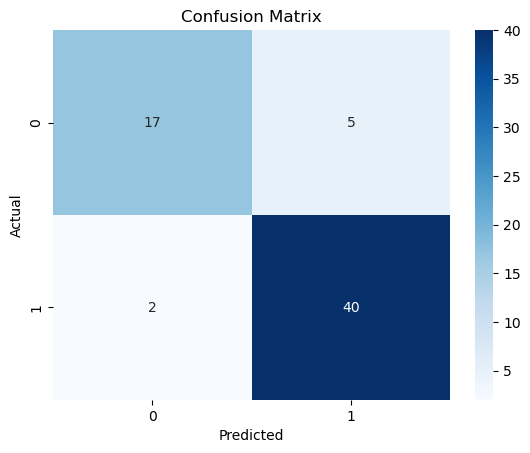

In [84]:

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### ROC Curve and AUC:

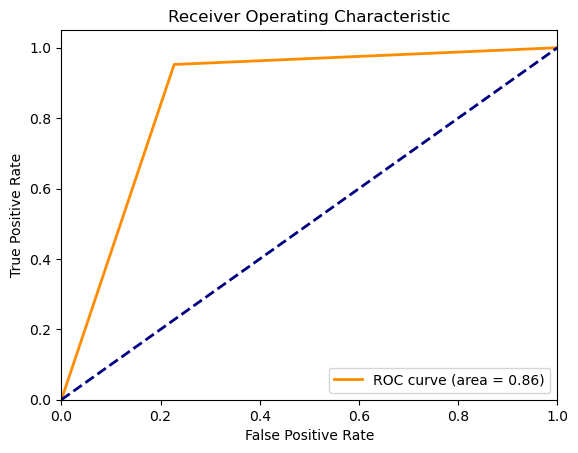

In [85]:

from sklearn.metrics import roc_curve, auc

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Precision-Recall Curve:

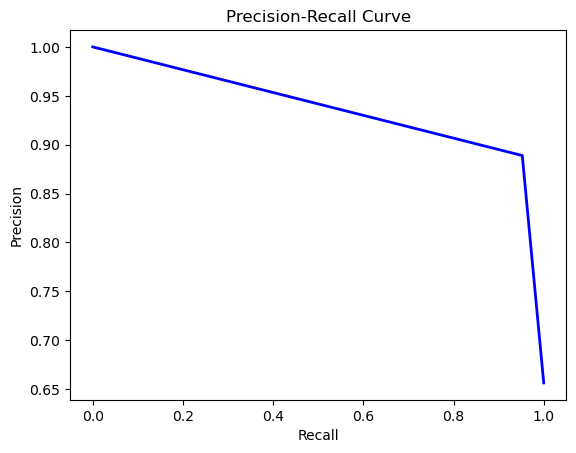

In [86]:

from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Misclassified Images:

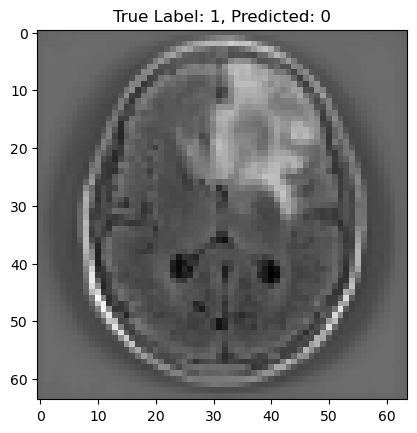

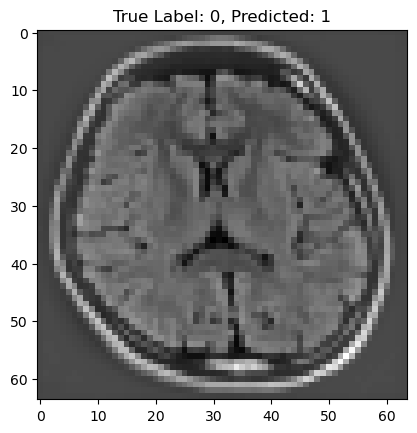

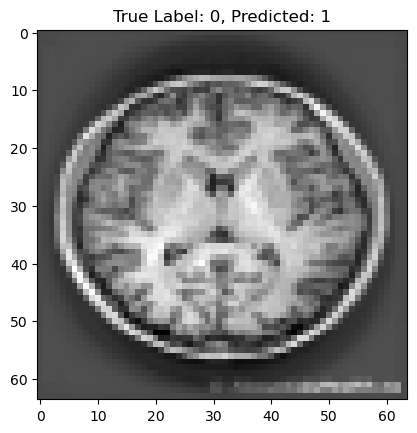

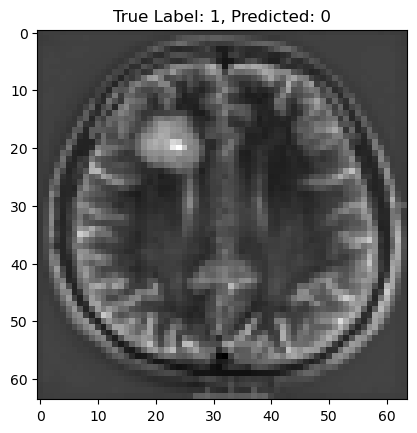

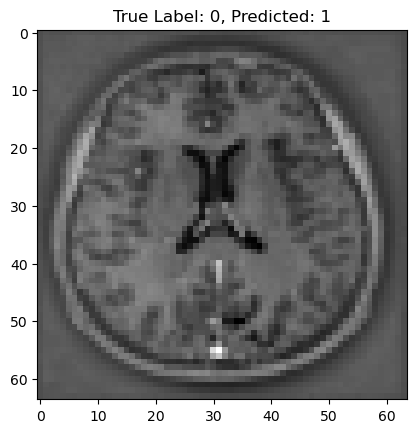

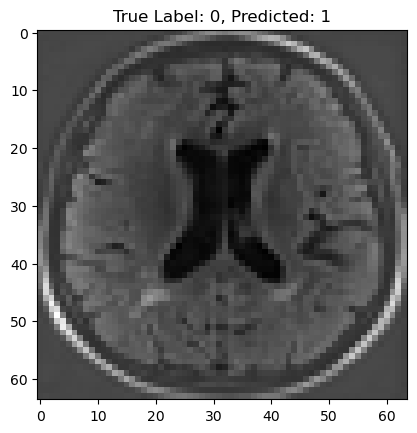

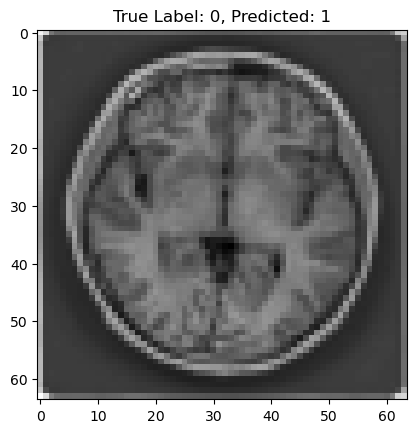

In [87]:

# Misclassified Images
misclassified_indices = np.where(y_test != y_pred)[0]

for index in misclassified_indices:
    plt.imshow(X_test[index].reshape(64, 64), cmap='gray')
    plt.title(f"True Label: {y_test[index]}, Predicted: {y_pred[index]}")
    plt.show()
